In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn import decomposition
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

In [2]:
class_names = ['dogs', 'cats', 'pandas']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)
class_names_label

{'dogs': 0, 'cats': 1, 'pandas': 2}

In [3]:
def loading():
    """
        Load the data:
            - Training sample count: 9000
            - Testing sample count : 2696
    """
    
    datasets = ['animal_train/', 'animal_test/']
    output = []
    
    # Iterate training and test data
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        print(dataset)
        print(os.listdir(dataset))
              
        # Iterate through labels (folder)
        for folder in os.listdir(dataset):
            print(folder)
            label = class_names_label[folder]
            
            # Iterate images in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Resizing the image
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append label to image
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = loading()

  1%|          | 21/4000 [00:00<00:19, 206.68it/s]

Loading animal_train/
animal_train/
['dogs', 'cats', 'pandas']
dogs


  1%|          | 44/4000 [00:00<00:09, 436.57it/s]

cats


  2%|▏         | 15/1000 [00:00<00:07, 140.17it/s]

pandas


  2%|▎         | 25/1000 [00:00<00:03, 244.77it/s]

Loading animal_test/
animal_test/
['dogs', 'cats', 'pandas']
dogs


  3%|▎         | 34/1000 [00:00<00:02, 333.13it/s]

cats


  2%|▏         | 15/696 [00:00<00:04, 142.54it/s]

pandas


100%|██████████| 696/696 [00:05<00:00, 125.03it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=20)

In [6]:
print ("Training sample count: {}".format(train_labels.shape[0]))
print ("Testing sample count : {}".format(test_labels.shape[0]))


Training sample count: 9000
Testing sample count : 2696


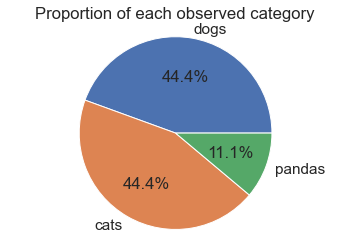

In [7]:
#Some representation of the data we are working with in terms of the amount of training and testing data we have
#Pie chart representation of the distribution of the dataset - dogs, cats and pandas
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            )

plt.pie(train_counts,
        explode=(0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [8]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [9]:
#Visualize the data

def pick_at_random(class_names, images, labels):
    """
      Picks an image at random from the dataset along with its corresponfing label from the training set
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image represents : '.format(index) + class_names[labels[index]])
    plt.show()

In [10]:
def display_examples(class_names, images, labels):
    """
        Showing 20 images with CORRECT labels from the dataset 
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Image + Label from Dataset", fontsize=16)
    for i in range(20):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

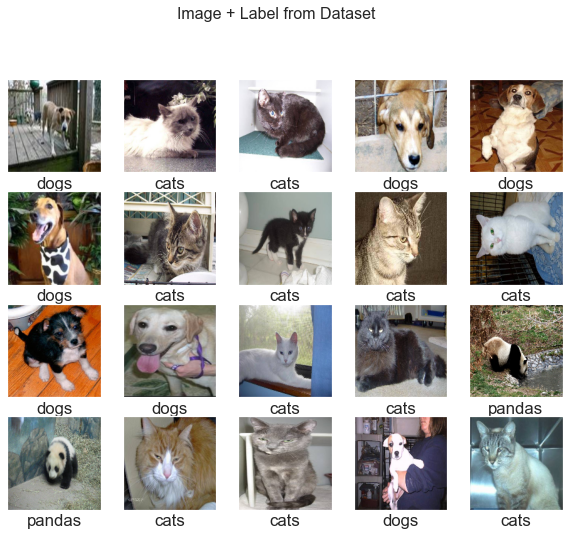

In [11]:
display_examples(class_names, train_images, train_labels)

In [12]:
#KERAS SEQUENTIAL
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
57/57 [==============================] - 172s 3s/step - loss: 1.2761 - accuracy: 0.4448 - val_loss: 0.7399 - val_accuracy: 0.6228
Epoch 2/10
57/57 [==============================] - 171s 3s/step - loss: 0.7010 - accuracy: 0.6544 - val_loss: 0.7167 - val_accuracy: 0.6233
Epoch 3/10
57/57 [==============================] - 274s 5s/step - loss: 0.6012 - accuracy: 0.7307 - val_loss: 0.6223 - val_accuracy: 0.7206
Epoch 4/10
57/57 [==============================] - 245s 4s/step - loss: 0.4744 - accuracy: 0.8027 - val_loss: 0.6581 - val_accuracy: 0.7044
Epoch 5/10
57/57 [==============================] - 276s 5s/step - loss: 0.3945 - accuracy: 0.8405 - val_loss: 0.6319 - val_accuracy: 0.7267
Epoch 6/10
57/57 [==============================] - 248s 4s/step - loss: 0.3276 - accuracy: 0.8622 - val_loss: 0.6808 - val_accuracy: 0.7194
Epoch 7/10
57/57 [==============================] - 247s 4s/step - loss: 0.2451 - accuracy: 0.9085 - val_loss: 0.7332 - val_accuracy: 0.7089
Epoch 8/10
57

In [15]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [16]:
test_loss = model.evaluate(test_images, test_labels)

85/85 [==============================] - 30s 347ms/step - loss: 0.7985 - accuracy: 0.7626


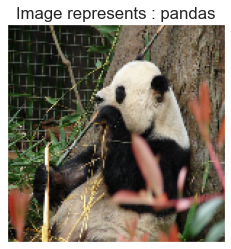

In [17]:
# Displaying an image from the test set with its predicted label
predictions = model.predict(test_images)     
pred_labels = np.argmax(predictions, axis = 1) # Taking the highest probability from the vector list

pick_at_random(class_names, test_images, pred_labels)

In [18]:
#Error Analysis for mislabeled images
def mislabeled(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 mislabeled images i.e; when predicted labels are not the same as test labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

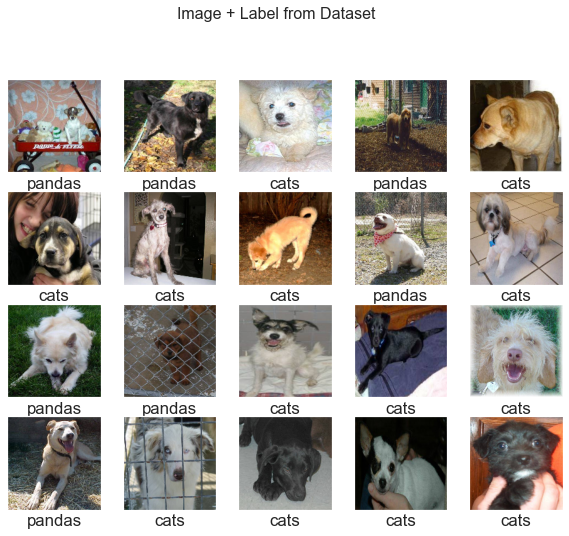

In [19]:
mislabeled(class_names, test_images, test_labels, pred_labels)

In [20]:
#Extracting features, fine tuning and training  with VGG



model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [21]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [22]:
model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer


x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [23]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9, 9, 512)]       0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0   

In [25]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
57/57 [==============================] - 528s 9s/step - loss: 2.4148 - accuracy: 0.4669 - val_loss: 0.4797 - val_accuracy: 0.8317
Epoch 2/10
57/57 [==============================] - 1959s 35s/step - loss: 0.4046 - accuracy: 0.8296 - val_loss: 0.2247 - val_accuracy: 0.9167
Epoch 3/10
57/57 [==============================] - 250s 4s/step - loss: 0.2095 - accuracy: 0.9195 - val_loss: 0.2289 - val_accuracy: 0.9111
Epoch 4/10
57/57 [==============================] - 218s 4s/step - loss: 0.1482 - accuracy: 0.9458 - val_loss: 0.2258 - val_accuracy: 0.9172
Epoch 5/10
57/57 [==============================] - 217s 4s/step - loss: 0.0996 - accuracy: 0.9602 - val_loss: 0.1983 - val_accuracy: 0.9311
Epoch 6/10
57/57 [==============================] - 222s 4s/step - loss: 0.0961 - accuracy: 0.9660 - val_loss: 0.2583 - val_accuracy: 0.9222
Epoch 7/10
57/57 [==============================] - 220s 4s/step - loss: 0.0502 - accuracy: 0.9854 - val_loss: 0.2505 - val_accuracy: 0.9278
Epoch 8/10


In [26]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.9143175074183977


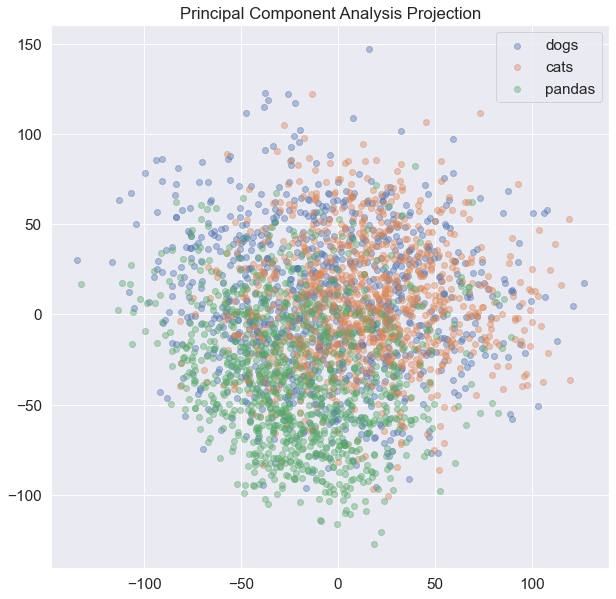

In [27]:
#Visualize through Principal Component Analysis
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z
pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) 
C1 = C[:,0]
C2 = C[:,1]

# The Principal Component Analysis Projection

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("Principal Component Analysis Projection")
plt.show()